In [32]:
from PIL import Image
import numpy as np
import json
#import matplotlib.pyplot as plt

img = Image.open("raw_image_data.png")

img = img.convert("RGB")

colors = [
    (25, 0, 117),
    (93, 26, 201),
    (176, 0, 150),
    (247, 25, 66),
    (247, 82, 82),
    (237, 149, 104),
    (255, 212, 105),
    (255, 255, 145),
    (255, 250, 181),
    (255, 255, 235),
    (255, 255, 255)
]

populacja_waw = 1765000

left = 20.852142
right = 21.257111
top = 52.366347
bottom = 52.100750

color_values = list(range(10, -1, -1))

color_to_value = {color: value for color, value in zip(colors, color_values)}

def find_closest_color_and_value(pixel):
    pixel_array = np.array(pixel)
    color_array = np.array(colors)
    distances = np.sqrt(np.sum((color_array - pixel_array) ** 2, axis=1))
    closest_color_index = np.argmin(distances)
    closest_color = colors[closest_color_index]
    value = color_to_value[closest_color]
    return value

width, height = img.size
image_values = np.zeros((height, width), dtype=int)
for y in range(height):
    for x in range(width):
        pixel = img.getpixel((x, y))
        value = find_closest_color_and_value(pixel)
        image_values[y, x] = value
        
#np.set_printoptions(threshold=np.inf)
#print(image_values)

image_values = image_values[~np.all(image_values == 0, axis=1)]
image_values = image_values[:, ~np.all(image_values == 0, axis=0)]

#plt.imshow(image_values, cmap='gray')
#plt.axis('off')
#plt.show()

height, width = image_values.shape

lr = round( (right - left) / width , 6)
tb = round( (top - bottom) / height , 6)

#print(lr)
#print(tb)

support = []

y = top
for row in image_values:
    x = left
    for pixel in row:
        support.append([pixel, round(x,6), round(y,6)])
        x += lr
    y -= tb
    
#print(support)

count = 0
for record in support:
    count += record[0]

ppl_per_point = round(populacja_waw / count, 0)

#print(ppl_per_point)

for record in support:
    record[0] = record[0] * ppl_per_point
#print(support)
    
final = []
for record in support:
    if(record[0] != 0):
        final.append(record)
        
data = [{
    "coordinates": {
        "lon": record[1],
        "lat": record[2]
    },
    "population": record[0]
} for record in final]

#print(data)

with open('population_density.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

In [37]:
print(517200000/len(final))

4553.217712826833


In [52]:
pop = [0,0,0,0,0,0,0,0,0,0]
zbi = set()
zbi2 = set()
tab=[]
for record in final:
    #zbi.add((record[0]/5)-1)
    #zbi2.add(record[0])
    #print((record[0]/5)-1)
    pop[int((record[0]/5)-1)] += 1
    tab.append(record[0])

In [41]:
zbi

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [43]:
zbi2

{5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0}

In [49]:
pop

[30, 75000, 11680, 12289, 1195, 8152, 3716, 1187, 280, 61]

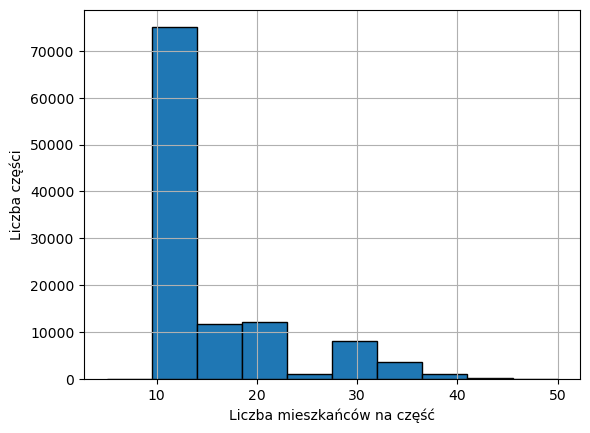

In [57]:
import matplotlib.pyplot as plt

plt.hist(tab, bins=10, edgecolor='black')  # Ustawienie liczby przedziałów na 5
plt.ylabel('Liczba części')
plt.xlabel('Liczba mieszkańców na część')
plt.grid(True)
plt.show()

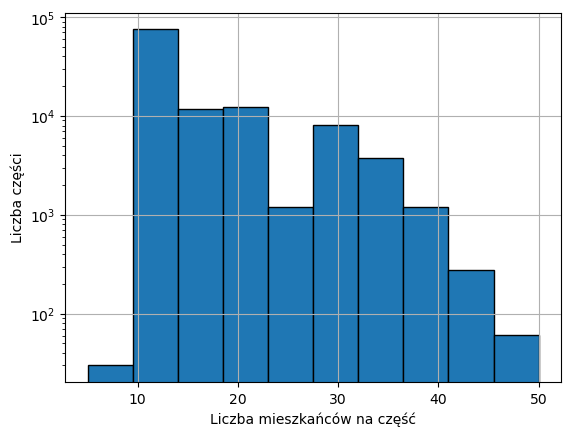

In [58]:
import matplotlib.pyplot as plt

plt.hist(tab, bins=10, edgecolor='black', log=True)  # Ustawienie liczby przedziałów na 5
plt.ylabel('Liczba części')
plt.xlabel('Liczba mieszkańców na część')
plt.grid(True)
plt.show()